In [199]:
import pandas as pd 
import numpy as np

In [200]:
df = pd.read_csv('house_data (2).csv')

In [201]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [203]:
df['date']=pd.to_datetime(df['date'])

#### Handling missing values 

In [204]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [205]:
df.drop('id',axis=1,inplace=True)

#### scaling

In [206]:
features = df.drop("price",axis=1)
target = df['price']

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=42)

In [208]:
num_col = features.drop('date',axis=1).columns

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[("scaling",StandardScaler(),num_col)])
x_train_scaled=preprocessor.fit_transform(x_train)
x_test_scaled=preprocessor.transform(x_test)

In [210]:
scaling=StandardScaler()
y_train_scaled=scaling.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled=scaling.transform(y_test.values.reshape(-1,1))

#### handling outliers

In [211]:
import matplotlib.pyplot as plt 


<function matplotlib.pyplot.show(close=None, block=None)>

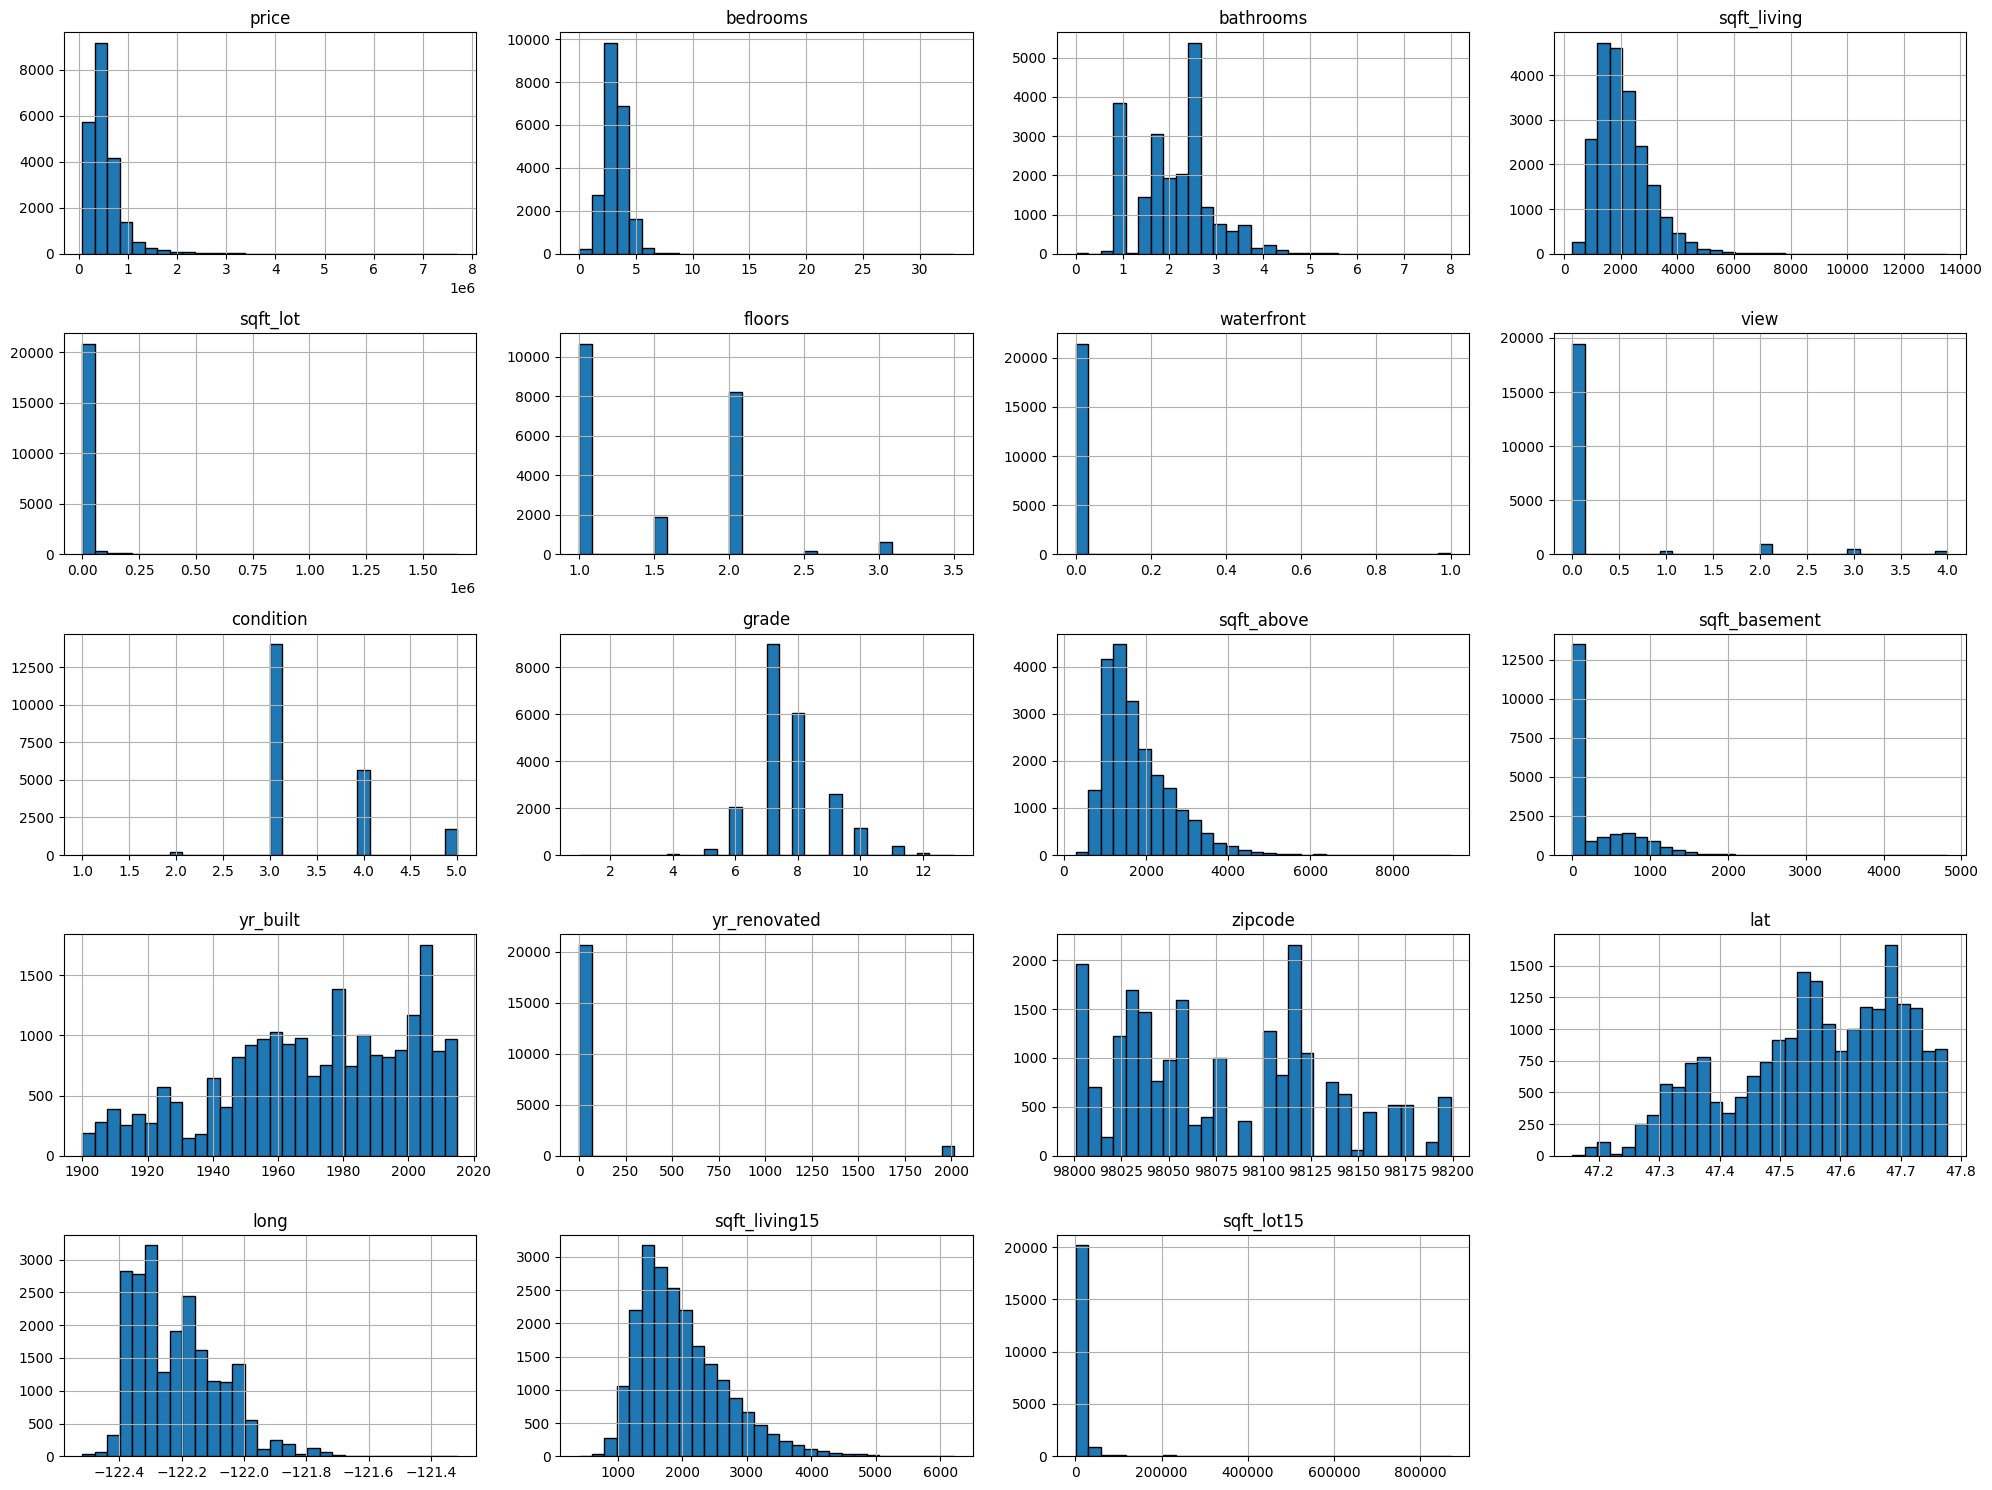

In [212]:
df.drop('date',axis=1).hist(figsize=(20,15),bins=30,edgecolor='black')
plt.tight_layout()

plt.show

In [213]:
## - waterfront: Indicates if the property has a waterfront view (binary: 0 = no, 1 = yes).
## - view: Quality of the view from the property (numerical scale).
## - condition: Condition of the house (numerical scale).
## - grade: Overall grade based on building and design (numerical scale).
## ● these columns won't be handled

In [214]:
handl_col = df.drop(['date','waterfront','view','condition','grade'],axis=1)


In [215]:
for col in handl_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    median = df[col].median()
    df.loc[df[col]<lower,col]=median
    df.loc[df[col]>upper,col]=median


#### Modeling 

In [216]:
from sklearn.linear_model import LinearRegression 
lin_reg_model=LinearRegression()
lin_reg_model.fit(x_train_scaled,y_train_scaled)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [219]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=lin_reg_model.predict(x_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f'MSE : \n{mse}')
print(f'\n\nMAE : \n{mae}')



MSE : 
449825567530.08234


MAE : 
547940.2446812264
